In [10]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
# Here specify the path to your directory
!ls "/content/gdrive/My Drive/DeepLearning" 
root_path = 'gdrive/My Drive/DeepLearning' 
path ='/content/gdrive/My Drive/DeepLearning'
os.chdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
ls: cannot access '/content/gdrive/My Drive/DeepLearning': No such file or directory


FileNotFoundError: ignored

In [0]:
# test of drive
print(os.getcwd())

In [2]:
import torch 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import numpy as np
torch.manual_seed(1)

#cite https://deepnotes.io/softmax-crossentropy
def stable_softmax(X):
    maximums = torch.max(X, 1)[0]
    exps = torch.exp(X - maximums.reshape(maximums.shape[0],1))
    sums = torch.sum(exps, 1) 
    return exps / sums.reshape(sums.shape[0],1)

def cross_entropy(X,y):
    """
    X is the output from fully connected layer (num_examples x num_classes)
    y is labels (num_examples x 1)
    	Note that y is not one-hot encoded vector. 
    	It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
    """

    m = y.shape[0]
    p = stable_softmax(X)
    #print("After softmax =", p[0,:], "shapesoftmax = ", p.shape)
    # We use multidimensional array indexing to extract 
    # softmax probability of the correct label for each sample.
    # Refer to https://docs.scipy.org/doc/numpy/user/basics.indexing.html#indexing-multi-dimensional-arrays for understanding multidimensional array indexing.
    oneHot = torch.FloatTensor(N, D_out)
    oneHot.zero_()
    oneHot.scatter_(1, y, 1)
    #print("OneHot is:", oneHot)
    #log_likelihood = -torch.log(p[range(m),y])
    new_log_likelihood = - oneHot * torch.log(p)
    #print("After loglikelihood =", log_likelihood[0,:],"log-likelihoodshape = ", log_likelihood.shape)
    #print("New loglikelihood=  ", new_log_likelihood[0,:], "newlogll shape = ", new_log_likelihood.shape, "total logl = ", new_log_likelihood)
    loss = torch.sum(new_log_likelihood) / m
    return loss

transform = transforms.Compose( [transforms.ToTensor()] )                          
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=60,     
                                          shuffle=True, num_workers=1)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=60,
                                         shuffle=False, num_workers=1)

wholeBatch = torch.FloatTensor()
for batch in trainloader:
  mini = batch[0].view(60, 28*28)
  wholeBatch = torch.cat((wholeBatch, mini),0)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU


      


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!





In [7]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 60, 28*28, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)
# One hot vector with the target labels for testing
# yOneHot = torch.from_numpy(np.eye(D_out)[np.random.choice(D_out, N)]).float()
y_onehot = torch.FloatTensor(N, D_out)

# requires_grad=True indicates the variables which the gradient has to be computed for
w0 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=False) * 0.1
w1 = torch.randn(H, H, device=device, dtype=dtype, requires_grad=False)    * 0.1
w2 = torch.randn(H, H, device=device, dtype=dtype, requires_grad=False)    * 0.1
wy = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=False)* 0.1
b0 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)    * 0.1
b1 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)    * 0.1
b2 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)    * 0.1
by = torch.randn(1, D_out, device=device, dtype=dtype, requires_grad=False)* 0.1

# vectors to create matrices with repeating rows. Used for bias, gamma and beta
ones = torch.ones(N, 1)
# vector to stabilize dividing by sqrt(var)
eps = torch.zeros(1, H)+0.001

## bb = beta, gg = gamma from the BN in the different layers
gg0 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)   * 0.1
bb0 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)   * 0.1
gg1 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)   * 0.1
bb1 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)   * 0.1
gg2 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)   * 0.1
bb2 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)   * 0.1

momentum = 0.9

vwy  = 0
vby  = 0
vgg2 = 0
vbb2 = 0
vw2  = 0
vb2  = 0
vgg1 = 0
vbb1 = 0
vw1  = 0
vb1  = 0
vgg0 = 0
vbb0 = 0
vw0  = 0
vb0  = 0

sigmoidActivation15Percentile = []
sigmoidActivation50Percentile = []
sigmoidActivation85Percentile = []
testAccuracyPerTrainingStep = []
learningRate = 0.1
for i in range(50):
  for j, batch in enumerate(trainloader):
    x = batch[0].view(N, D_in)
    y = batch[1].view(N, 1)
    ones = torch.ones(N, 1)

    #add dimensions for comprehension
    h0_lin = x.mm(w0) + ones.mm(b0) #N*h
    mean0 = h0_lin.mean(0).reshape(1,H)
    var0 = h0_lin.var(0).reshape(1,H)
    h0_hat = (h0_lin - ones.mm(mean0))/torch.sqrt(ones.mm(var0) + ones.mm(eps))
    h0_bn = h0_hat*(ones.mm(gg0)) + ones.mm(bb0)
    h0 = h0_bn.sigmoid()

    h1_lin = h0.mm(w1) + ones.mm(b1)
    mean1 = h1_lin.mean(0).reshape(1,H)
    var1 = h1_lin.var(0).reshape(1,H)
    h1_hat = (h1_lin - ones.mm(mean1))/torch.sqrt(ones.mm(var1) + ones.mm(eps))
    h1_bn = h1_hat*(ones.mm(gg2)) + ones.mm(bb1)
    h1 = h1_bn.sigmoid()

    h2_lin = h1.mm(w2) + ones.mm(b2)
    mean2 = h2_lin.mean(0).reshape(1,H)
    var2 = h2_lin.var(0).reshape(1,H)
    h2_hat = (h2_lin - ones.mm(mean2))/torch.sqrt(ones.mm(var2) + ones.mm(eps))
    h2_bn = h2_hat*(ones.mm(gg2)) + ones.mm(bb2)
    h2 = h2_bn.sigmoid()
    
    y_pred = h2.mm(wy) + ones.mm(by) # ypred = "alin" in the derivations
    
    # loss = cross_entropy(y_pred, yOneHot.argmax(axis=1))
    #print(y_pred[0],y[0,:])
    loss = cross_entropy(y_pred, y)
    
    if j % 50 == 0:
      print("Loss function at epoch", i, "and at batch", j, " is ", loss.detach().numpy() )
    
    # backward pass 
    # dL omitted so dh = dL/dh
    y_onehot.zero_()
    y_onehot.scatter_(1, y, 1)
    dy_pred = (stable_softmax(y_pred) - y_onehot) / N
    # dy_pred = dy_pred/m
    # dy_pred = stable_softmax(y_pred) - yOneHot
    dwy = h2.T.mm(dy_pred)
    dby = ones.T.mm(dy_pred)
    
    dh2 = dy_pred.mm(wy.T)
    dh2_bn = dh2 * (h2 * (1 - h2))
    dgg2 = ones.T.mm(dh2_bn * h2_hat)
    dbb2 = ones.T.mm(dh2_bn)
    
    dh2_hat = dh2_bn * (ones.mm(gg2))
    dvar2 = ones.T.mm((dh2_hat * (h2_lin - ones.mm(mean2))) * (-1/2) * (ones.mm(var2) + ones.mm(eps))**(-3/2))
    dmean2 = ones.T.mm(dh2_hat * (-1)/torch.sqrt(ones.mm(var2) + ones.mm(eps))) + dvar2 * ones.T.mm(-2/N*(h2_lin - ones.mm(mean2)))
    dh2_lin = dh2_hat * 1/torch.sqrt(ones.mm(var2) + ones.mm(eps)) + ones.mm(dvar2) * 2/N*(h2_lin - ones.mm(mean2)) + ones.mm(dmean2)/N
    dw2 = h1.T.mm(dh2_lin)
    db2 = ones.T.mm(dh2_lin)
    
    dh1 = dh2_lin.mm(w2.T)
    dh1_bn = dh1 * (h1 * (1 - h1))
    dgg1 = ones.T.mm(dh1_bn * h1_hat)
    dbb1 = ones.T.mm(dh1_bn)
    
    dh1_hat = dh1_bn * (ones.mm(gg1))
    dvar1 = ones.T.mm((dh1_hat * (h1_lin - ones.mm(mean1))) * (-1/2) * (ones.mm(var1) + ones.mm(eps))**(-3/2))
    dmean1 = ones.T.mm(dh1_hat * (-1)/torch.sqrt(ones.mm(var1) + ones.mm(eps))) + dvar1 * ones.T.mm(-2/N*(h1_lin - ones.mm(mean1)))
    dh1_lin = dh1_hat * 1/torch.sqrt(ones.mm(var1) + ones.mm(eps)) + ones.mm(dvar1) * 2/N*(h1_lin - ones.mm(mean1)) + ones.mm(dmean1)/N
    dw1 = h0.T.mm(dh1_lin)
    db1 = ones.T.mm(dh1_lin)
    
    dh0 = dh1_lin.mm(w1.T)
    dh0_bn = dh0 * (h0 * (1 - h0))
    dgg0 = ones.T.mm(dh0_bn * h0_hat)
    dbb0 = ones.T.mm(dh0_bn)
    
    dh0_hat = dh0_bn * (ones.mm(gg0))
    dvar0 = ones.T.mm((dh0_hat * (h0_lin - ones.mm(mean0))) * (-1/2) * (ones.mm(var0) + ones.mm(eps))**(-3/2))
    dmean0 = ones.T.mm(dh0_hat * (-1)/torch.sqrt(ones.mm(var0) + ones.mm(eps))) + dvar0 * ones.T.mm(-2/N*(h0_lin - ones.mm(mean0)))
    dh0_lin = dh0_hat * 1/torch.sqrt(ones.mm(var0) + ones.mm(eps)) + ones.mm(dvar0) * 2/N*(h0_lin - ones.mm(mean0)) + ones.mm(dmean0)/N
    dw0 = x.T.mm(dh0_lin)
    db0 = ones.T.mm(dh0_lin)
    
    #momentum
    vwy  = momentum * vwy  + (1 - momentum) * dwy 
    vby  = momentum * vby  + (1 - momentum) * dby 
    vgg2 = momentum * vgg2 + (1 - momentum) * dgg2
    vbb2 = momentum * vbb2 + (1 - momentum) * dbb2
    vw2  = momentum * vw2  + (1 - momentum) * dw2 
    vb2  = momentum * vb2  + (1 - momentum) * db2 
    vgg1 = momentum * vgg1 + (1 - momentum) * dgg1
    vbb1 = momentum * vbb1 + (1 - momentum) * dbb1
    vw1  = momentum * vw1  + (1 - momentum) * dw1 
    vb1  = momentum * vb1  + (1 - momentum) * db1 
    vgg0 = momentum * vgg0 + (1 - momentum) * dgg0
    vbb0 = momentum * vbb0 + (1 - momentum) * dbb0
    vw0  = momentum * vw0  + (1 - momentum) * dw0 
    vb0  = momentum * vb0  + (1 - momentum) * db0 

    # update
    wy -= learningRate* vwy 
    by -= learningRate* vby 
    gg2 -= learningRate*vgg2
    bb2 -= learningRate*vbb2
    w2 -= learningRate* vw2 
    b2 -= learningRate* vb2 
    gg1 -= learningRate*vgg1
    bb1 -= learningRate*vbb1
    w1 -= learningRate* vw1 
    b1 -= learningRate* vb1 
    gg0 -= learningRate*vgg0
    bb0 -= learningRate*vbb0
    w0 -= learningRate* vw0 
    b0 -= learningRate* vb0 

    if j % 50 == 0:
      sigmoidActivation15Percentile.append(np.percentile(h2_bn.detach().numpy(), 15))
      sigmoidActivation50Percentile.append(np.percentile(h2_bn.detach().numpy(), 50))
      sigmoidActivation85Percentile.append(np.percentile(h2_bn.detach().numpy(), 85))
      #print("15 Percentiles: ", sigmoidActivation15Percentile)
      #print("50 Percentiles: ", sigmoidActivation50Percentile)
      #print("85 Percentiles: ", sigmoidActivation85Percentile)

    # test accuracy
    if j == 0:
      accuracyOfTrainingStep = []


      ones = torch.ones(wholeBatch.shape[0], 1)

      h0_lin = wholeBatch.mm(w0) + ones.mm(b0) #N*h
      mean0 = h0_lin.mean(0).reshape(1,H)
      var0 = h0_lin.var(0).reshape(1,H)
      h0_hat = (h0_lin - ones.mm(mean0))/torch.sqrt(ones.mm(var0) + ones.mm(eps))
      h0_bn = h0_hat*(ones.mm(gg0)) + ones.mm(bb0)
      h0 = h0_bn.sigmoid()

      h1_lin = h0.mm(w1) + ones.mm(b1)
      mean1 = h1_lin.mean(0).reshape(1,H)
      var1 = h1_lin.var(0).reshape(1,H)
      h1_hat = (h1_lin - ones.mm(mean1))/torch.sqrt(ones.mm(var1) + ones.mm(eps))
      h1_bn = h1_hat*(ones.mm(gg2)) + ones.mm(bb1)
      h1 = h1_bn.sigmoid()

      h2_lin = h1.mm(w2) + ones.mm(b2)
      mean2 = h2_lin.mean(0).reshape(1,H)
      var2 = h2_lin.var(0).reshape(1,H)
      #print("shapes", wholeBatch.shape, mean0.shape, mean1.shape, mean2.shape, var0.shape, var2.shape, var2.shape)


      for k, testbatch in enumerate(testloader):
        x_test = testbatch[0].view(testbatch[0].shape[0], D_in)
        y_test = testbatch[1].view(testbatch[0].shape[0], 1)
        ones = torch.ones(testbatch[0].shape[0], 1)

        h0_lin = x_test.mm(w0) + ones.mm(b0) #N*h
        #mean0 = h0_lin.mean(0).reshape(1,H)
        #var0 = h0_lin.var(0).reshape(1,H)
        h0_hat = (h0_lin - ones.mm(mean0))/torch.sqrt(ones.mm(var0) + ones.mm(eps))
        h0_bn = h0_hat*(ones.mm(gg0)) + ones.mm(bb0)
        h0 = h0_bn.sigmoid()

        h1_lin = h0.mm(w1) + ones.mm(b1)
        #mean1 = h1_lin.mean(0).reshape(1,H)
        #var1 = h1_lin.var(0).reshape(1,H)
        h1_hat = (h1_lin - ones.mm(mean1))/torch.sqrt(ones.mm(var1) + ones.mm(eps))
        h1_bn = h1_hat*(ones.mm(gg2)) + ones.mm(bb1)
        h1 = h1_bn.sigmoid()

        h2_lin = h1.mm(w2) + ones.mm(b2)
        #mean2 = h2_lin.mean(0).reshape(1,H)
        #var2 = h2_lin.var(0).reshape(1,H)
        h2_hat = (h2_lin - ones.mm(mean2))/torch.sqrt(ones.mm(var2) + ones.mm(eps))
        h2_bn = h2_hat*(ones.mm(gg2)) + ones.mm(bb2)
        h2 = h2_bn.sigmoid()
        
        y_pred = h2.mm(wy) + ones.mm(by)
        y_prediction = stable_softmax(y_pred)
        y_pred_labels = y_prediction.argmax(axis=1).reshape(testbatch[0].shape[0], 1)

        if k == 0:
          print("Testing test minibatch at training step ", j, " of epoch ", i)
        accuracyOfTrainingStep.append(np.sum(y_pred_labels.numpy() == y_test.numpy()))
        #print("accuracy of this training minibatch", np.sum(y_pred_labels.numpy() == y_test.numpy()))
      #print("accuracy of trainingstep", accuracyOfTrainingStep)

      accuracyOfTrainingStep = np.sum(np.array(accuracyOfTrainingStep)) / 10000
      testAccuracyPerTrainingStep.append(accuracyOfTrainingStep)

      print("Accuracy of training step", i*(j+1)*1000," = ", accuracyOfTrainingStep )

Loss function at epoch 0 and at batch 0  is  2.4524496
Testing test minibatch at training step  0  of epoch  0
Accuracy of training step 0  =  0.098
Loss function at epoch 0 and at batch 50  is  2.299849
Loss function at epoch 0 and at batch 100  is  2.304149
Loss function at epoch 0 and at batch 150  is  2.32404
Loss function at epoch 0 and at batch 200  is  2.3000834
Loss function at epoch 0 and at batch 250  is  2.2891893
Loss function at epoch 0 and at batch 300  is  2.3051615
Loss function at epoch 0 and at batch 350  is  2.274529
Loss function at epoch 0 and at batch 400  is  2.2496796
Loss function at epoch 0 and at batch 450  is  2.2159169
Loss function at epoch 0 and at batch 500  is  2.1623383
Loss function at epoch 0 and at batch 550  is  2.0776212
Loss function at epoch 0 and at batch 600  is  1.9299561
Loss function at epoch 0 and at batch 650  is  1.7788575
Loss function at epoch 0 and at batch 700  is  1.6485975
Loss function at epoch 0 and at batch 750  is  1.442109
Los

In [0]:
print(np.percentile(h2_bn.detach().numpy(), 85))

1.372256916761398


In [8]:
# requires_grad=True indicates the variables which the gradient has to be computed for
w0 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=False) * 0.1
w1 = torch.randn(H, H, device=device, dtype=dtype, requires_grad=False)    * 0.1
w2 = torch.randn(H, H, device=device, dtype=dtype, requires_grad=False)    * 0.1
wy = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=False)* 0.1
b0 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)    * 0.1
b1 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)    * 0.1
b2 = torch.randn(1, H, device=device, dtype=dtype, requires_grad=False)    * 0.1
by = torch.randn(1, D_out, device=device, dtype=dtype, requires_grad=False)* 0.1

# vectors to create matrices with repeating rows. Used for bias, gamma and beta
ones = torch.ones(N, 1)

vwy  = 0
vby  = 0
vgg2 = 0
vbb2 = 0
vw2  = 0
vb2  = 0
vgg1 = 0
vbb1 = 0
vw1  = 0
vb1  = 0
vgg0 = 0
vbb0 = 0
vw0  = 0
vb0  = 0

sigmoidActivation15PercentileNoBN = []
sigmoidActivation50PercentileNoBN = []
sigmoidActivation85PercentileNoBN = []
testAccuracyPerTrainingStepNoBN = []
learningRate = 0.1
for i in range(50):
  for j, batch in enumerate(trainloader):
    x = batch[0].view(N, D_in)
    y = batch[1].view(N, 1)
    ones = torch.ones(N, 1)

    #add dimensions for comprehension
    h0_lin = x.mm(w0) + ones.mm(b0) #N*h
    h0 = h0_lin.sigmoid()

    h1_lin = h0.mm(w1) + ones.mm(b1)
    h1 = h1_lin.sigmoid()

    h2_lin = h1.mm(w2) + ones.mm(b2)
    h2 = h2_lin.sigmoid()
    
    y_pred = h2.mm(wy) + ones.mm(by) # ypred = "alin" in the derivations
    
    loss = cross_entropy(y_pred, y)
    
    if j % 50 == 0:
      print("No BN: Loss function at epoch", i, "and at batch", j, " is ", loss.detach().numpy() )
    
    # backward pass 
    # dL omitted so dh = dL/dh
    y_onehot.zero_()
    y_onehot.scatter_(1, y, 1)
    dy_pred = (stable_softmax(y_pred) - y_onehot) / N 
    dwy = h2.T.mm(dy_pred)
    dby = ones.T.mm(dy_pred)
    
    dh2 = dy_pred.mm(wy.T)
    dh2_lin = dh2 * (h2 * (1 - h2))
    
    dw2 = h1.T.mm(dh2_lin)
    db2 = ones.T.mm(dh2_lin)
    
    dh1 = dh2_lin.mm(w2.T)
    dh1_lin = dh1 * (h1 * (1 - h1))
    
    dw1 = h0.T.mm(dh1_lin)
    db1 = ones.T.mm(dh1_lin)
    
    dh0 = dh1_lin.mm(w1.T)
    dh0_lin = dh0 * (h0 * (1 - h0))
    
    dw0 = x.T.mm(dh0_lin)
    db0 = ones.T.mm(dh0_lin)
    
    #momentum
    vwy  = momentum * vwy  + (1 - momentum) * dwy 
    vby  = momentum * vby  + (1 - momentum) * dby 
    vgg2 = momentum * vgg2 + (1 - momentum) * dgg2
    vbb2 = momentum * vbb2 + (1 - momentum) * dbb2
    vw2  = momentum * vw2  + (1 - momentum) * dw2 
    vb2  = momentum * vb2  + (1 - momentum) * db2 
    vgg1 = momentum * vgg1 + (1 - momentum) * dgg1
    vbb1 = momentum * vbb1 + (1 - momentum) * dbb1
    vw1  = momentum * vw1  + (1 - momentum) * dw1 
    vb1  = momentum * vb1  + (1 - momentum) * db1 
    vgg0 = momentum * vgg0 + (1 - momentum) * dgg0
    vbb0 = momentum * vbb0 + (1 - momentum) * dbb0
    vw0  = momentum * vw0  + (1 - momentum) * dw0 
    vb0  = momentum * vb0  + (1 - momentum) * db0 

    # update
    wy -= learningRate* vwy 
    by -= learningRate* vby 
    gg2 -= learningRate*vgg2
    bb2 -= learningRate*vbb2
    w2 -= learningRate* vw2 
    b2 -= learningRate* vb2 
    gg1 -= learningRate*vgg1
    bb1 -= learningRate*vbb1
    w1 -= learningRate* vw1 
    b1 -= learningRate* vb1 
    gg0 -= learningRate*vgg0
    bb0 -= learningRate*vbb0
    w0 -= learningRate* vw0 
    b0 -= learningRate* vb0 

    # saving activations
    if j % 50 == 0:
      sigmoidActivation15PercentileNoBN.append(np.percentile(h2_lin.detach().numpy(), 15))
      sigmoidActivation50PercentileNoBN.append(np.percentile(h2_lin.detach().numpy(), 50))
      sigmoidActivation85PercentileNoBN.append(np.percentile(h2_lin.detach().numpy(), 85))
      #print("15 Percentiles: ", sigmoidActivation15PercentileNoBN)
      #print("50 Percentiles: ", sigmoidActivation50PercentileNoBN)
      #print("85 Percentiles: ", sigmoidActivation85PercentileNoBN)

    # test accuracy
    if j == 0:
      accuracyOfTrainingStepNoBN = []
      for k, testbatch in enumerate(testloader):
        x_test = testbatch[0].view(testbatch[0].shape[0], D_in)
        y_test = testbatch[1].view(testbatch[0].shape[0], 1)
        ones = torch.ones(testbatch[0].shape[0], 1)

        h0_lin = x_test.mm(w0) + ones.mm(b0) #N*h
        h0 = h0_lin.sigmoid()

        h1_lin = h0.mm(w1) + ones.mm(b1)
        h1 = h1_lin.sigmoid()

        h2_lin = h1.mm(w2) + ones.mm(b2)
        h2 = h2_lin.sigmoid()

        y_pred = h2.mm(wy) + ones.mm(by)
        y_prediction = stable_softmax(y_pred)
        y_pred_labels = y_prediction.argmax(axis=1).reshape(testbatch[0].shape[0], 1)

        if k == 0:
          print("Testing test minibatch at training step ", j, " of epoch ", i)
        accuracyOfTrainingStepNoBN.append(np.sum(y_pred_labels.numpy() == y_test.numpy()))
        #print("accuracy of this training minibatch", np.sum(y_pred_labels.numpy() == y_test.numpy()))
      #print("accuracy of trainingstep", accuracyOfTrainingStep)

      accuracyOfTrainingStepNoBN = np.sum(np.array(accuracyOfTrainingStepNoBN)) / 10000
      testAccuracyPerTrainingStepNoBN.append(accuracyOfTrainingStepNoBN)

      print("Accuracy of training step", i*(j+1)*1000," = ", accuracyOfTrainingStepNoBN )
      

    
      

      


No BN: Loss function at epoch 0 and at batch 0  is  2.5088093
Testing test minibatch at training step  0  of epoch  0
Accuracy of training step 0  =  0.1135
No BN: Loss function at epoch 0 and at batch 50  is  2.3102522
No BN: Loss function at epoch 0 and at batch 100  is  2.3096955
No BN: Loss function at epoch 0 and at batch 150  is  2.3153687
No BN: Loss function at epoch 0 and at batch 200  is  2.283
No BN: Loss function at epoch 0 and at batch 250  is  2.3043566
No BN: Loss function at epoch 0 and at batch 300  is  2.3162801
No BN: Loss function at epoch 0 and at batch 350  is  2.2596402
No BN: Loss function at epoch 0 and at batch 400  is  2.2604954
No BN: Loss function at epoch 0 and at batch 450  is  2.2782693
No BN: Loss function at epoch 0 and at batch 500  is  2.2832613
No BN: Loss function at epoch 0 and at batch 550  is  2.256439
No BN: Loss function at epoch 0 and at batch 600  is  2.2312198
No BN: Loss function at epoch 0 and at batch 650  is  2.2359922
No BN: Loss funct

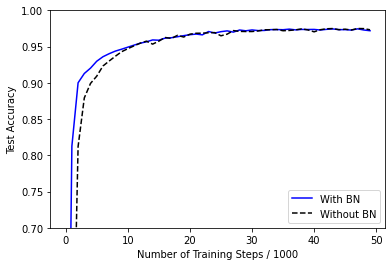

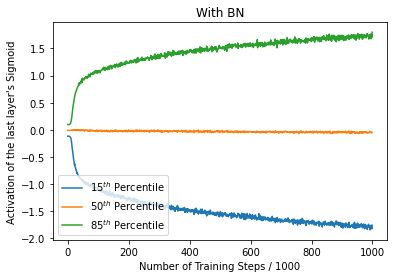

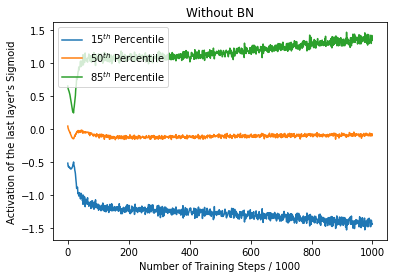

In [11]:
plt.figure()
plt.plot(testAccuracyPerTrainingStep, 'b', label='With BN')
plt.plot(testAccuracyPerTrainingStepNoBN, '--k', label='Without BN')
plt.xlabel('Number of Training Steps / 1000')
plt.ylabel('Test Accuracy')
plt.ylim(0.7, 1)
plt.savefig('Accuracy_LR0-1.png', dpi=200)
plt.legend()

plt.figure()
plt.plot(sigmoidActivation15Percentile, label=r'$15^{th}$ Percentile')
plt.plot(sigmoidActivation50Percentile, label=r'$50^{th}$ Percentile')
plt.plot(sigmoidActivation85Percentile, label=r'$85^{th}$ Percentile')
plt.xlabel('Number of Training Steps / 1000')
plt.ylabel("Activation of the last layer's Sigmoid")
plt.title("With BN")
plt.legend()

plt.figure()
plt.plot(sigmoidActivation15PercentileNoBN, label=r'$15^{th}$ Percentile')
plt.plot(sigmoidActivation50PercentileNoBN, label=r'$50^{th}$ Percentile')
plt.plot(sigmoidActivation85PercentileNoBN, label=r'$85^{th}$ Percentile')
plt.xlabel('Number of Training Steps / 1000')
plt.ylabel("Activation of the last layer's Sigmoid")
plt.title("Without BN")
plt.legend()